<a href="https://colab.research.google.com/github/ManavGuru/Portfolio/blob/master/CSCE_633_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA EXPLORATION

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#IMPORTING THE DATA FROM THE DATASETS.
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from skimage import data, io, filters

path = "/content/drive/My Drive/Homework3_Data/Train_Data.csv"

path3 = "/content/drive/My Drive/Homework3_Data/Validation_Data.csv"
train_data_df = pd.read_csv(path)

validation_data_df = pd.read_csv(path3)

In [0]:
#Creating data arrays
train_labels = train_data_df['emotion']
valid_labels = validation_data_df['emotion']

train_pixels = train_data_df.drop('emotion',axis=1)
train_pixels = train_pixels.to_numpy()

valid_pixels = validation_data_df.drop('emotion',axis=1)
valid_pixels = valid_pixels.to_numpy()

def image_display(i):
  image = train_pixels[i][0]
  shape = (48,48)
  image = [int(k) for k in image.split(' ')]
  image = np.array(image)
  image = image.reshape(shape)
  plt.title(train_labels[i])
  plt.imshow(image)
  plt.show()

In [0]:
#----------------------------TESTTING STUFF
path2 = "/content/drive/My Drive/Homework3_Data/Test_Data.csv"
test_data_df = pd.read_csv(path2)
test_labels = test_data_df['emotion']

test_pixels = test_data_df.drop('emotion',axis=1)
test_pixels = test_pixels.to_numpy()
test_image_array = []
for i in range (len(test_pixels)): 
  temp = test_pixels[i][0]
  temp = [int(k) for k in temp.split(' ')]
  temp = np.array(temp)
  test_image_array.append(temp)

test_image_array = np.array(test_image_array)


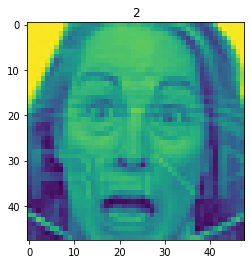

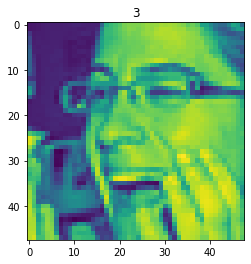

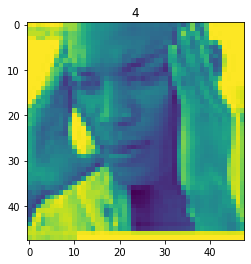

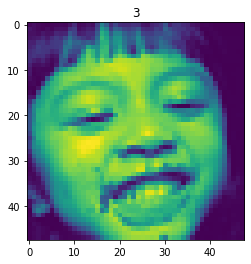

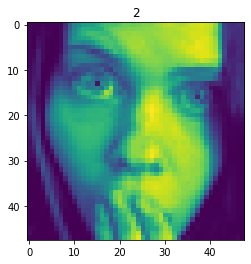

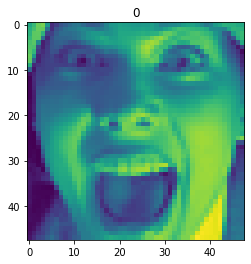

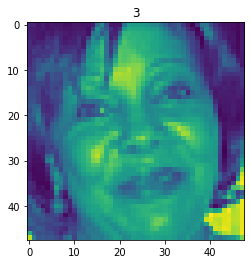

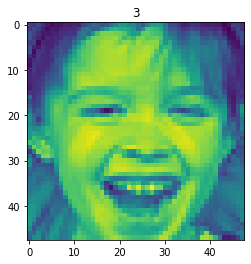

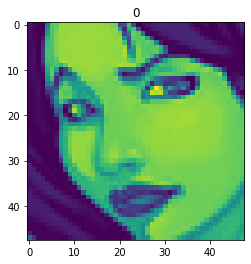

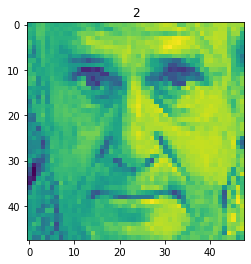

In [6]:
import random
my_randoms=[]
for i in range (10):
    my_randoms.append(random.randrange(1,len(train_pixels),1))
for i in my_randoms: 
  image_display(i)

In [7]:
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0 
count5 = 0 
count6 = 0
for i in range(len(train_labels)):
  if (train_labels[i]==0):
    count0 += 1
  elif(train_labels[i]==1):
    count1 += 1
  elif(train_labels[i]==2):
    count2 += 1
  elif(train_labels[i]==3):
    count3 += 1
  elif(train_labels[i]==4): 
    count4 += 1 
  elif(train_labels[i]==5):
    count5 += 1
  elif(train_labels[i]==6):
    count6 += 1 
  else: 
    print("Oops.")
total = count0+count1+count2+count3+count4+\
        count5+count6
print("\nAngry:   ",count0,"\nDisgust:  ", count1,"\nFear:    ",count2,\
      "\nHappy:   ",count3,"\nSad:     ",count4,"\nSurprise:" \
      , count5,"\nNeutral: " ,count6,"\n_______\nTotal:  ",total)


Angry:    3995 
Disgust:   436 
Fear:     4097 
Happy:    7215 
Sad:      4830 
Surprise: 3171 
Neutral:  4965 
_______
Total:   28709


#FNN


In [0]:
train_image_array = []
for i in range (len(train_pixels)): 
  temp = train_pixels[i][0]
  temp = [int(k) for k in temp.split(' ')]
  temp = np.array(temp)
  train_image_array.append(temp)

In [0]:
valid_image_array = []
for i in range (len(valid_pixels)): 
  temp = valid_pixels[i][0]
  temp = [int(k) for k in temp.split(' ')]
  temp = np.array(temp)
  valid_image_array.append(temp)

In [0]:
train_image_array = np.array(train_image_array)
valid_image_array = np.array(valid_image_array)

In [0]:
from skimage import data, io, filters
#noramlise all the images
train_image_array = (train_image_array / 255) - 0.5
valid_image_array = (valid_image_array / 255) -0.5
test_image_array = (test_image_array / 255) -0.5

# train_image_array = filters.sobel(train_image_array)
# valid_image_array = filters.sobel(valid_image_array)
# test_image_array = filters.sobel(test_image_array)

In [12]:
import warnings 
import keras
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import regularizers


# # Flatten the images into vectors (1D) for feed forward network
# flatten_train_images = train_image_array.reshape((-1, 48*48))
# flatten_test_images = test_image_array.reshape((-1, 48*48))
# flatten_valid_images = valid_image_array.reshape((-1, 48*48))

Using TensorFlow backend.


In [0]:
import time
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [0]:
# Evaluate your model's performance on the test data
def model_test(model):
  performance = model.evaluate(valid_image_array, to_categorical(valid_labels))
  print("\nAccuracy on Test samples: {0}".format(performance[1]))

In [0]:
# Compiling the model 
def model_compile(model):
  model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)
# Train model
  time_callback = TimeHistory()
  hist = model.fit(train_image_array, to_categorical(train_labels), epochs=10, batch_size=256,callbacks=[time_callback])
  
  plt.plot(hist.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train'], loc='upper left')
  plt.show()
  print("\nTotal Training Time is: ", sum(time_callback.times),'s.\n')

  0%|          | 0/25 [00:00<?, ?it/s, best loss: ?]

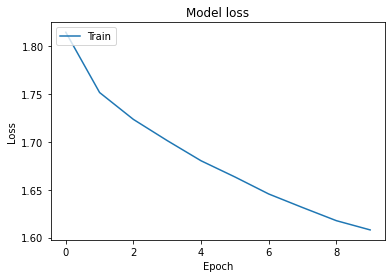

Total Training Time is (s): 
7.4364213943481445
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.25336800158266903, 'optimizer': 'sgd'}
Accuracy: 
0.39091668988991396
----------------------------------------------------
  4%|▍         | 1/25 [00:07<03:11,  8.00s/it, best loss: -0.39091668988991396]

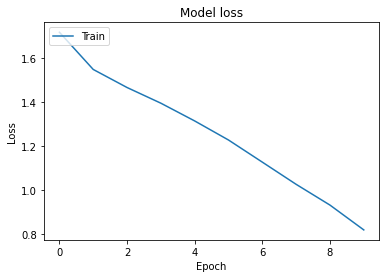

Total Training Time is (s): 
9.509779930114746
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.10552055620174437, 'optimizer': 'Adam'}
Accuracy: 
0.4488715519726393
----------------------------------------------------
  8%|▊         | 2/25 [00:18<03:19,  8.66s/it, best loss: -0.4488715519726393] 

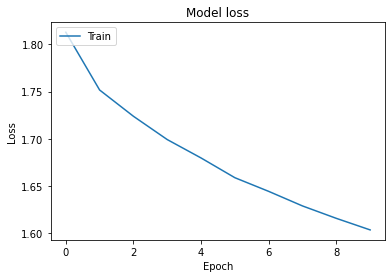

Total Training Time is (s): 
7.328493356704712
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.1759849523388486, 'optimizer': 'sgd'}
Accuracy: 
0.38311507384502713
----------------------------------------------------
 12%|█▏        | 3/25 [00:26<03:05,  8.44s/it, best loss: -0.4488715519726393]

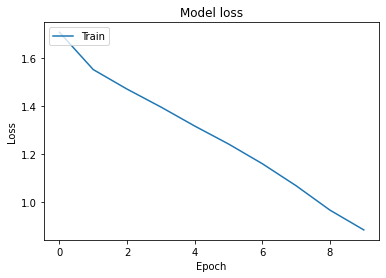

Total Training Time is (s): 
9.538674116134644
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.18842808735315886, 'optimizer': 'Adam'}
Accuracy: 
0.4555586514681553
----------------------------------------------------
 16%|█▌        | 4/25 [00:36<03:08,  8.98s/it, best loss: -0.4555586514681553]

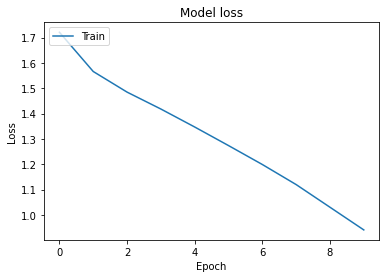

Total Training Time is (s): 
9.489769220352173
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.2476540471215125, 'optimizer': 'Adam'}
Accuracy: 
0.4636388966368912
----------------------------------------------------
 20%|██        | 5/25 [00:46<03:07,  9.35s/it, best loss: -0.4636388966368912]

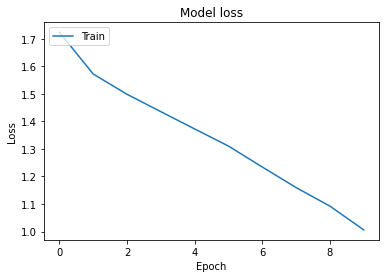

Total Training Time is (s): 
9.495479583740234
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.3644742571285925, 'optimizer': 'Adam'}
Accuracy: 
0.44859292282803076
----------------------------------------------------
 24%|██▍       | 6/25 [00:56<03:02,  9.62s/it, best loss: -0.4636388966368912]

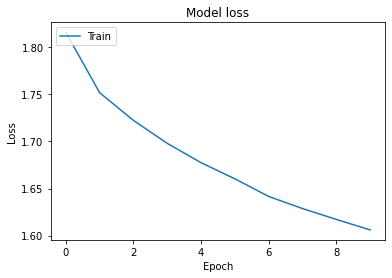

Total Training Time is (s): 
7.4017863273620605
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.2555559787727395, 'optimizer': 'sgd'}
Accuracy: 
0.3842295904234612
----------------------------------------------------
 28%|██▊       | 7/25 [01:04<02:44,  9.15s/it, best loss: -0.4636388966368912]

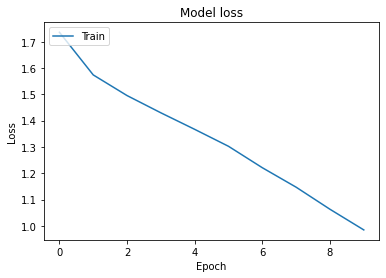

Total Training Time is (s): 
9.604174613952637
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.32319345246869036, 'optimizer': 'Adam'}
Accuracy: 
0.45277236002207
----------------------------------------------------
 32%|███▏      | 8/25 [01:15<02:42,  9.57s/it, best loss: -0.4636388966368912]

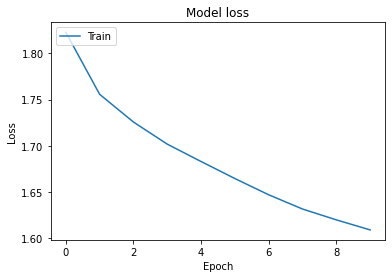

Total Training Time is (s): 
7.4649622440338135
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.3406336734941001, 'optimizer': 'sgd'}
Accuracy: 
0.38255781556411383
----------------------------------------------------
 36%|███▌      | 9/25 [01:23<02:26,  9.15s/it, best loss: -0.4636388966368912]

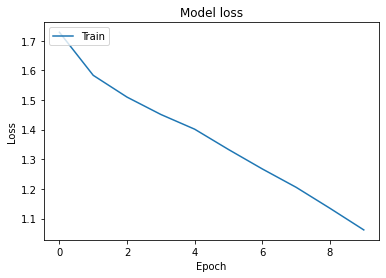

Total Training Time is (s): 
9.565871000289917
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.4370333627480284, 'optimizer': 'Adam'}
Accuracy: 
0.44998606855107337
----------------------------------------------------
 40%|████      | 10/25 [01:34<02:22,  9.52s/it, best loss: -0.4636388966368912]

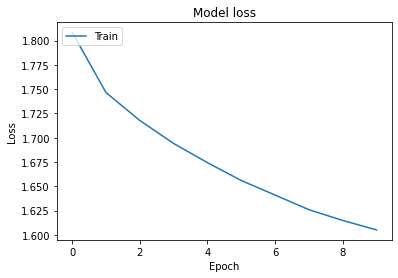

Total Training Time is (s): 
7.352118968963623
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.2464429141873418, 'optimizer': 'sgd'}
Accuracy: 
0.3836723321342442
----------------------------------------------------
 44%|████▍     | 11/25 [01:42<02:07,  9.10s/it, best loss: -0.4636388966368912]

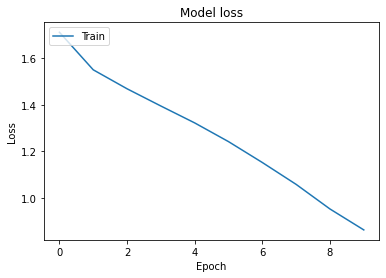

Total Training Time is (s): 
9.775615215301514
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.1675727368174647, 'optimizer': 'Adam'}
Accuracy: 
0.4533296182863757
----------------------------------------------------
 48%|████▊     | 12/25 [01:52<02:04,  9.56s/it, best loss: -0.4636388966368912]

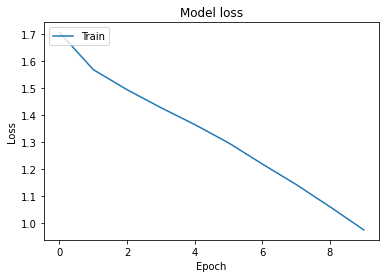

Total Training Time is (s): 
9.897839069366455
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.3479228659873571, 'optimizer': 'Adam'}
Accuracy: 
0.4488715519726393
----------------------------------------------------
 52%|█████▏    | 13/25 [02:03<01:59,  9.93s/it, best loss: -0.4636388966368912]

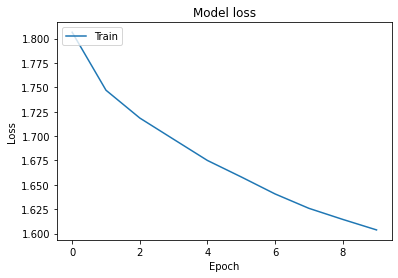

Total Training Time is (s): 
7.853139162063599
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.23118676879866445, 'optimizer': 'sgd'}
Accuracy: 
0.3898021733156317
----------------------------------------------------
 56%|█████▌    | 14/25 [02:12<01:45,  9.55s/it, best loss: -0.4636388966368912]

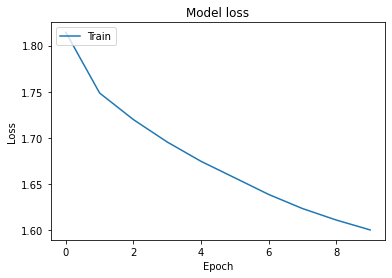

Total Training Time is (s): 
7.92191481590271
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.11349796190538407, 'optimizer': 'sgd'}
Accuracy: 
0.3870158818695465
----------------------------------------------------
 60%|██████    | 15/25 [02:20<01:33,  9.31s/it, best loss: -0.4636388966368912]

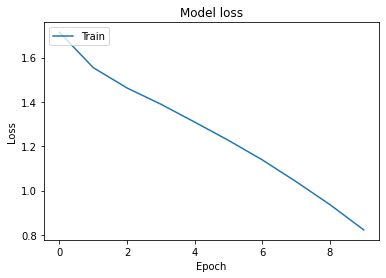

Total Training Time is (s): 
10.156506061553955
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.10106341569977983, 'optimizer': 'Adam'}
Accuracy: 
0.44051267765929486
----------------------------------------------------
 64%|██████▍   | 16/25 [02:32<01:28,  9.83s/it, best loss: -0.4636388966368912]

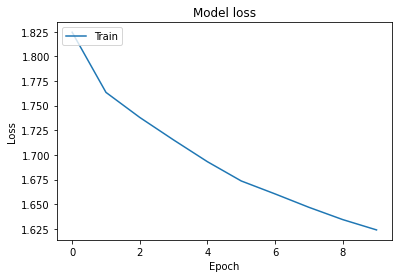

Total Training Time is (s): 
8.006651639938354
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.49276434949032477, 'optimizer': 'sgd'}
Accuracy: 
0.38478684870852636
----------------------------------------------------
 68%|██████▊   | 17/25 [02:40<01:16,  9.55s/it, best loss: -0.4636388966368912]

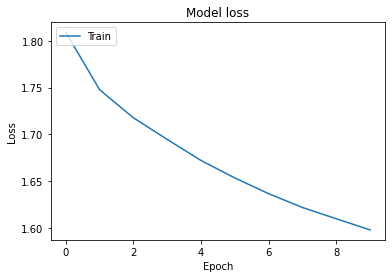

Total Training Time is (s): 
8.145221471786499
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.11279906259430761, 'optimizer': 'sgd'}
Accuracy: 
0.3825578155516582
----------------------------------------------------
 72%|███████▏  | 18/25 [02:50<01:06,  9.44s/it, best loss: -0.4636388966368912]

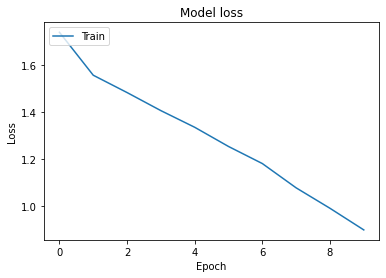

Total Training Time is (s): 
10.069785594940186
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.21733738187782758, 'optimizer': 'Adam'}
Accuracy: 
0.45834494288517724
----------------------------------------------------
 76%|███████▌  | 19/25 [03:01<00:59,  9.93s/it, best loss: -0.4636388966368912]

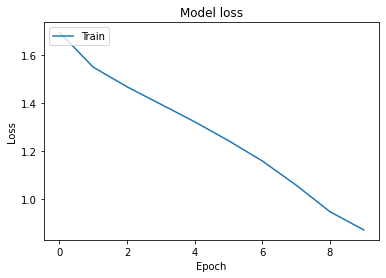

Total Training Time is (s): 
10.192638874053955
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.14335957639670258, 'optimizer': 'Adam'}
Accuracy: 
0.4589022011785462
----------------------------------------------------
 80%|████████  | 20/25 [03:12<00:51, 10.32s/it, best loss: -0.4636388966368912]

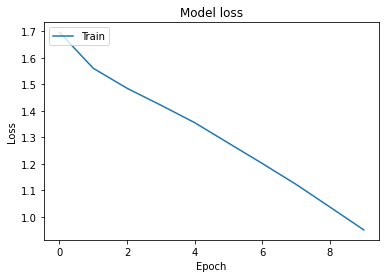

Total Training Time is (s): 
10.345960855484009
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.2936624860958402, 'optimizer': 'Adam'}
Accuracy: 
0.45110058512950746
----------------------------------------------------
 84%|████████▍ | 21/25 [03:23<00:42, 10.64s/it, best loss: -0.4636388966368912]

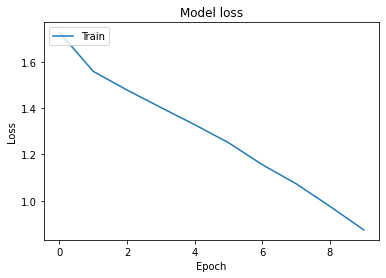

Total Training Time is (s): 
10.243130207061768
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.15123480999583044, 'optimizer': 'Adam'}
Accuracy: 
0.4494288102618563
----------------------------------------------------
 88%|████████▊ | 22/25 [03:35<00:32, 10.84s/it, best loss: -0.4636388966368912]

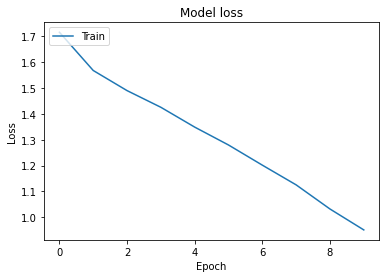

Total Training Time is (s): 
10.352617740631104
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.28900076526664475, 'optimizer': 'Adam'}
Accuracy: 
0.44524937309272844
----------------------------------------------------
 92%|█████████▏| 23/25 [03:46<00:22, 11.03s/it, best loss: -0.4636388966368912]

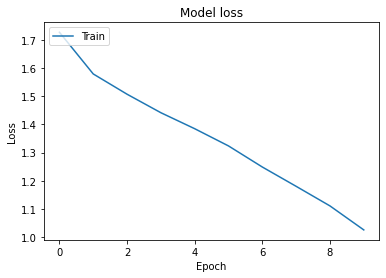

Total Training Time is (s): 
10.280369758605957
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.40388349489252084, 'optimizer': 'Adam'}
Accuracy: 
0.45082195600981034
----------------------------------------------------
 96%|█████████▌| 24/25 [03:57<00:11, 11.13s/it, best loss: -0.4636388966368912]

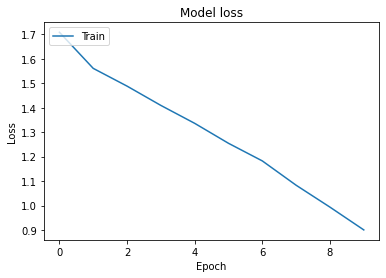

Total Training Time is (s): 
10.576332807540894
Hyperparameters: 
{'activation_fn': 'relu', 'dropout_prob': 0.2051775684138893, 'optimizer': 'Adam'}
Accuracy: 
0.45277236002207
----------------------------------------------------
100%|██████████| 25/25 [04:09<00:00,  9.98s/it, best loss: -0.4636388966368912]
Best Hyperparameters {'activation_fn': 0, 'dropout_prob': 0.2476540471215125, 'optimizer': 0}
3589/3589 [==============================] - 0s 49us/step
Test Accuracy:  0.45528002229863535


In [0]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

#MODEL 1
#Define a Feed-Forward Model with 2 hidden layers with dimensions 392 and 196 Neurons
def optimize_fnn(hyperparameter):
  model = Sequential([
    Dense(2304, activation=hyperparameter['activation_fn'], input_shape=(48*48,), name="first_hidden_layer",),
    Dense(2304//2, activation=hyperparameter['activation_fn'], name="second_hidden_layer",),Dropout(hyperparameter['dropout_prob']),
    Dense(7, activation='softmax'),
  ])
  #  Validate your Model Architecture
  #print(model1.summary())
  model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)
  time_callback = TimeHistory()
  hist = model.fit(train_image_array, to_categorical(train_labels), epochs=10, batch_size=256,verbose=0,callbacks=[time_callback])
  plt.plot(hist.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train'], loc='upper left')
  plt.show()
  print("Total Training Time is (s): ", sum(time_callback.times))

  performance = model.evaluate(valid_image_array, to_categorical(valid_labels), verbose=0)
  
  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  # We want to minimize loss i.e. negative of accuracy
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":model})

# Define search space for hyper-parameters
space = {
    # The activation_fn choices:
    'activation_fn':hp.choice('activation_fn',['relu']),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.5),
    # Choice of optimizer 
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

best = fmin(
        optimize_fnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=25,
    )

print("========================================================================")
print("Best Hyperparameters", best)

# You can retrain the final model with optimal hyperparameters on train+validation data

# Or you can use the model returned directly
# Find trial which has minimum loss value and use that model to perform evaluation on the test data
test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(test_image_array, to_categorical(test_labels))

print("==================================")
print("Test Accuracy: ", performance[1])



#CNNs


In [0]:
from keras.layers import Conv2D, Flatten, MaxPooling2D

# Flatten the images into vectors (1D) for feed forward network
train_images_3d = train_image_array.reshape((len(train_image_array),48,48,1))
test_images_3d = test_image_array.reshape((len(test_image_array), 48,48,1))
valid_images_3d = valid_image_array.reshape((len(valid_image_array), 48,48,1))

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(64, kernel_size=(3,3), strides=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(64, kernel_size=(3,3), activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.3),
            Conv2D(128, kernel_size=3, activation='relu'),
            Conv2D(128, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.3), Flatten(),]

classifier = [Dense(512, activation='relu'), Dense(7, activation='relu'),]
cnn_model = Sequential(common_features+classifier)
print(cnn_model.summary())
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)      

In [0]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
def run_cnn_model(kSize, dropout_rate):
  # Define 2 groups of layers: features layer (convolutions) and classification layer
  common_features = [Conv2D(64, kernel_size=(kSize), strides=3, activation='relu', input_shape=(48,48,1)), 
              Conv2D(64, kernel_size=(kSize), activation='relu'), 
              MaxPooling2D(pool_size=(2,2)), Dropout(dropout_rate),
              Conv2D(128, kernel_size=(kSize), activation='relu'),
              Conv2D(128, kernel_size=(kSize), activation='relu'), 
              MaxPooling2D(pool_size=(2,2)), Dropout(dropout_rate), Flatten(),]

  classifier = [Dense(512, activation='relu'), Dense(7, activation='relu'),]
  cnn_model = Sequential(common_features+classifier)
  print("Kernel Size: {0} \nDropout: {1}".format(kSize,dropout_rate))
  print(cnn_model.summary())
  cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)
  # Train model
  cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=256,)

  performance = cnn_model.evaluate(valid_images_3d, to_categorical(valid_labels))
  print("Accuracy on Test samples: {0}".format(performance[1]))
  results.append(performance[1])


In [0]:
dropout_range = [0.1,0.2,0.3,0.4,0.5]
kernels = [2,3]
featureK = []
featureD = []
# Flatten the images into vectors (1D) for feed forward network
train_images_3d = train_image_array.reshape((len(train_image_array),48,48,1))
test_images_3d = test_image_array.reshape((len(test_image_array), 48,48,1))
valid_images_3d = valid_image_array.reshape((len(valid_image_array), 48,48,1))
results = []
for i in dropout_range: 
  for j in kernels:
    run_cnn_model(j,i)
    featureK.append(j)
    featureD.append(i)
print(results)

Kernel Size: 2 
Dropout: 0.1
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 16, 16, 64)        320       
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 15, 15, 64)        16448     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 6, 6, 128)         32896     
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 5, 5, 128)         65664     
_________________________________________________________________
max_pooling2d_58 (MaxPoo

In [0]:
best=(np.argmax(results))
print('Best Feature Pair is: {0} and {1}'.format(featureK[best], featureD[best]))
print("Best performance from training:",results[best])
kSize = featureK[best]
dropout_rate = featureD[best]
common_features = [Conv2D(64, kernel_size=(kSize), strides=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(64, kernel_size=(kSize), activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(dropout_rate),
            Conv2D(128, kernel_size=(kSize), activation='relu'),
            Conv2D(128, kernel_size=(kSize), activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(dropout_rate), Flatten(),]

classifier = [Dense(512, activation='relu'), Dense(7, activation='relu'),]
cnn_model = Sequential(common_features+classifier)
print("Kernel Size: {0} \nDropout: {1}".format(kSize,dropout_rate))
print(cnn_model.summary())
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)
# Train model
cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=256,)

performance = cnn_model.evaluate(test_images_3d, to_categorical(test_labels))
print("Accuracy on Test samples: {0}".format(performance[1]))

Best Feature Pair is: 3 and 0.3
Best performance from training: 0.45082195598489894
Kernel Size: 3 
Dropout: 0.3
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_157 (Conv2D)          (None, 16, 16, 64)        640       
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_79 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 3, 3, 128)         147584    
______

In [0]:
def optimize_cnn(hyperparameter):
  
  # Define model using hyperparameters 
  cnn_model = Sequential([Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']), 
            Flatten(),
            Dense(512, activation='relu'), 
            Dense(7, activation='softmax'),])
  
  cnn_model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)
  time_callback = TimeHistory()
  hist = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=256, verbose=0,callbacks=[time_callback])
  # print(hist.history.accuracy)
  print("Total Training Time is (s): ", sum(time_callback.times))
  # Evaluate accuracy on validation data
  performance = cnn_model.evaluate(valid_images_3d, to_categorical(valid_labels), verbose=0)

  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  # We want to minimize loss i.e. negative of accuracy
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":cnn_model})


# Define search space for hyper-parameters
space = {
    # The kernel_size for convolutions:
    'conv_kernel_size': hp.choice('conv_kernel_size', [1, 3, 5]),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
    # Choice of optimizer 
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

# Find the best hyperparameters
best = fmin(
        optimize_cnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=25,
    )

print("==================================")
print("Best Hyperparameters", best)

# You can retrain the final model with optimal hyperparameters on train+validation data

# Or you can use the model returned directly
# Find trial which has minimum loss value and use that model to perform evaluation on the test data
test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(test_images_3d, to_categorical(test_labels))

print("==================================")
print("Test Accuracy: ", performance[1])

Total Training Time is (s): 
28.2460458278656
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.14668735307891242, 'optimizer': 'sgd'}
Accuracy: 
0.3399275564265537
----------------------------------------------------
Total Training Time is (s): 
23.3261399269104
Hyperparameters: 
{'conv_kernel_size': 1, 'dropout_prob': 0.17386172811548062, 'optimizer': 'sgd'}
Accuracy: 
0.3265533575144077
----------------------------------------------------
Total Training Time is (s): 
29.898162126541138
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.16029133971157797, 'optimizer': 'Adam'}
Accuracy: 
0.5770409585174726
----------------------------------------------------
Total Training Time is (s): 
28.340755224227905
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.19075674893547134, 'optimizer': 'sgd'}
Accuracy: 
0.3558094176692397
----------------------------------------------------
Total Training Time is (s): 
28.23865532875061
Hyperparameters: 
{'conv_kernel_size

KeyboardInterrupt: ignored

#FINE TUNING

In [0]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input
 #Load MNISt dataset
(train_imagesf, train_labelsf), (test_imagesf, test_labelsf) = mnist.load_data()
train_imagesf = (train_imagesf / 255) - 0.5
test_imagesf = (test_imagesf / 255) - 0.5

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images_3df = train_imagesf.reshape(60000,28,28,1)
test_images_3df = test_imagesf.reshape(10000,28,28,1)
train_images_3df = train_images_3df[:28709]
train_labelsf = train_labelsf[:28709]
test_images_3df = test_images_3df[:3589]
test_labelsf = test_labelsf[:3589]

Base_feature_model = Sequential([Conv2D(32, kernel_size=3, activation='relu'), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25), 
            Dense(512, activation='relu'), Flatten(),])

# Define task-specific classifiation layers
Classifier_mnist = Dense(10, activation='softmax', name='MNIST')
Classifier_fer = Dense(7, activation='softmax', name='FER')

# Instantiate a Tensor to feed Input (Input Layer)
mnist_input = Input(shape=(28,28,1))
fer_input = Input(shape=(48,48,1))

# Call Base_feature_model over the mnist images
mnist_features = Base_feature_model(mnist_input)

# Call Base_feature_model over the fashion-mnist images
fer_features = Base_feature_model(fer_input)

# Call mnist_prediction layer over the mnist images
# mnist_prediction represents the predicted output for mnist dataset
mnist_prediction = Classifier_mnist(mnist_features)

# Call fashion_mnist_prediction layer over the mnist images
# fashion_mnist_prediction represents the predicted output for fashion-mnist dataset
fer_prediction = Classifier_fer(fer_features)


joint_model = Model(inputs=[mnist_input, fer_input], 
                    outputs=[mnist_prediction, fer_prediction])

print(joint_model.summary())

joint_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'],)  # Using adam optimizer for faster convergence

joint_model.fit([train_images_3df, train_images_3d], 
                [to_categorical(train_labelsf), to_categorical(train_labels)], 
                epochs=2, batch_size=1024,)
performance = joint_model.evaluate([test_images_3df, valid_images_3d], 
                                   [to_categorical(test_labelsf), 
                                    to_categorical(valid_labels)], verbose=1)

print("===\nMNIST Accuracy: {0}\nFER Accuracy: {1}".format(performance[3], performance[4]))
performance = joint_model.evaluate([test_images_3df, test_images_3d], 
                                   [to_categorical(test_labelsf), 
                                    to_categorical(test_labels)], verbose=1)

print("===\nMNIST Accuracy: {0}\nFER Accuracy: {1}".format(performance[3], performance[4]))

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       multiple             98272       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
MNIST (Dense)                   (None, 10)           81930       sequential_2[1][0]         

#Fine tuning using the MNIST Model.





In [0]:
import cv2
from skimage.transform import resize
# Resizing the images. 
flatten_train_images = train_image_array.reshape((-1, 48,48))
flatten_test_images = test_image_array.reshape((-1, 48,48))
flatten_valid_images = valid_image_array.reshape((-1,48,48))
resized_images_train = []
resized_images_test = []
resized_images_valid = []
# for i in range(len(flatten_test_images)):
for i in range(len(train_pixels)):
  img = flatten_train_images[i]
  img=cv2.resize(img, dsize=(28,28),interpolation=cv2.INTER_CUBIC)
  resized_images_train.append(img)
resized_images_train = np.array(resized_images_train)

for i in range(len(valid_pixels)):
  img = flatten_valid_images[i]
  img=cv2.resize(img, dsize=(28,28),interpolation=cv2.INTER_CUBIC)
  resized_images_valid.append(img)
resized_images_valid = np.array(resized_images_valid)


for i in range(len(test_pixels)):
  img = flatten_test_images[i]
  img=cv2.resize(img, dsize=(28,28),interpolation=cv2.INTER_CUBIC)
  resized_images_test.append(img)
resized_images_test = np.array(resized_images_test)


In [0]:
from keras.layers import Conv2D, Flatten, MaxPooling2D

# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25), Flatten(),]
classifier = [Dense(512, activation='relu'), Dense(10, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)

print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3df = train_imagesf.reshape(60000,28,28,1)
test_images_3df = test_imagesf.reshape(10000,28,28,1)

cnn_model.fit(train_images_3df, to_categorical(train_labelsf), epochs=10, batch_size=256,)
performance = cnn_model.evaluate(test_images_3df, to_categorical(test_labelsf))

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)        

In [0]:
for l in common_features:
  l.trainable = False

classifier2 = [Dense(512, activation='relu'), Dense(7, activation='softmax'),]

cnn_model.add(Dense(7,activation='softmax'))
print(cnn_model.summary())
resized_images_valid_3d = resized_images_valid.reshape(3589,28,28,1)
resized_images_train_3d = resized_images_train.reshape(28709,28,28,1)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)

cnn_model.fit(resized_images_train_3d, to_categorical(train_labels), epochs=8, batch_size=256,)
performance = cnn_model.evaluate(resized_images_valid_3d, to_categorical(valid_labels))

print("Accuracy on Test samples: {0}".format(performance[1]))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)        

#Data Augmentation


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
datagen = ImageDataGenerator()

#feature standardization
x_train = (train_image_array)
x_valid = (valid_image_array)
x_test = (test_image_array)

x_train = x_train.reshape((x_train.shape[0], 48, 48, 1))
x_valid = x_valid.reshape((x_valid.shape[0], 48, 48, 1))
x_test = x_test.reshape((x_valid.shape[0], 48, 48, 1))

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(x_train)
datagen.fit(x_valid)
datagen.fit(x_test)

In [0]:
def optimize_cnn(hyperparameter):
  
  # Define model using hyperparameters 
  cnn_model = Sequential([Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']), 
            Flatten(),
            Dense(512, activation='relu'), 
            Dense(7, activation='softmax'),])
  
  cnn_model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)
  time_callback = TimeHistory()
  hist = cnn_model.fit(x_train, to_categorical(train_labels), epochs=10, batch_size=256, verbose=0,callbacks=[time_callback])
  # print(hist.history.accuracy)
  print("Total Training Time is (s): ", sum(time_callback.times))
  # Evaluate accuracy on validation data
  performance = cnn_model.evaluate(x_valid, to_categorical(valid_labels), verbose=0)

  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  # We want to minimize loss i.e. negative of accuracy
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":cnn_model})


# Define search space for hyper-parameters
space = {
    # The kernel_size for convolutions:
    'conv_kernel_size': hp.choice('conv_kernel_size', [1, 3, 5]),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
    # Choice of optimizer 
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

# Find the best hyperparameters
best = fmin(
        optimize_cnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=25,
    )

print("==================================")
print("Best Hyperparameters", best)

# You can retrain the final model with optimal hyperparameters on train+validation data

# Or you can use the model returned directly
# Find trial which has minimum loss value and use that model to perform evaluation on the test data
test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(x_test, to_categorical(test_labels))

print("==================================")
print("Test Accuracy: ", performance[1])

Total Training Time is (s): 
26.69492268562317
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.2542249469349509, 'optimizer': 'Adam'}
Accuracy: 
0.5856784619754255
----------------------------------------------------
Total Training Time is (s): 
26.36576533317566
Hyperparameters: 
{'conv_kernel_size': 5, 'dropout_prob': 0.1339069129108087, 'optimizer': 'Adam'}
Accuracy: 
0.5881861242727504
----------------------------------------------------
Total Training Time is (s): 
25.207025289535522
Hyperparameters: 
{'conv_kernel_size': 5, 'dropout_prob': 0.18646617942102145, 'optimizer': 'sgd'}
Accuracy: 
0.3290610197868212
----------------------------------------------------
Total Training Time is (s): 
25.25748372077942
Hyperparameters: 
{'conv_kernel_size': 5, 'dropout_prob': 0.2422444255685212, 'optimizer': 'sgd'}
Accuracy: 
0.33630537754664286
----------------------------------------------------
Total Training Time is (s): 
25.461172342300415
Hyperparameters: 
{'conv_kernel_siz

In [0]:
# ZCA Whitening 
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
datagen = ImageDataGenerator()

#feature standardization
x_train = (train_image_array)
x_valid = (valid_image_array)
x_test = (test_image_array)

x_train = x_train.reshape((x_train.shape[0], 48, 48, 1))
x_valid = x_valid.reshape((x_valid.shape[0], 48, 48, 1))
x_test = x_test.reshape((x_valid.shape[0], 48, 48, 1))

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(x_train)
datagen.fit(x_valid)
datagen.fit(x_test)

In [0]:
def optimize_cnn(hyperparameter):
  
  # Define model using hyperparameters 
  cnn_model = Sequential([Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']), 
            Flatten(),
            Dense(512, activation='relu'), 
            Dense(7, activation='softmax'),])
  
  cnn_model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)
  time_callback = TimeHistory()
  hist = cnn_model.fit(x_train, to_categorical(train_labels), epochs=10, batch_size=256, verbose=0,callbacks=[time_callback])
  # print(hist.history.accuracy)
  print("Total Training Time is (s): ", sum(time_callback.times))
  # Evaluate accuracy on validation data
  performance = cnn_model.evaluate(x_valid, to_categorical(valid_labels), verbose=0)

  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  # We want to minimize loss i.e. negative of accuracy
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":cnn_model})


# Define search space for hyper-parameters
space = {
    # The kernel_size for convolutions:
    'conv_kernel_size': hp.choice('conv_kernel_size', [1, 3, 5]),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
    # Choice of optimizer 
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

# Find the best hyperparameters
best = fmin(
        optimize_cnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=25,
    )

print("==================================")
print("Best Hyperparameters", best)

# You can retrain the final model with optimal hyperparameters on train+validation data

# Or you can use the model returned directly
# Find trial which has minimum loss value and use that model to perform evaluation on the test data
test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(x_test, to_categorical(test_labels))

print("==================================")
print("Test Accuracy: ", performance[1])

Total Training Time is (s): 
28.13971781730652
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.24814050988778366, 'optimizer': 'sgd'}
Accuracy: 
0.34912231820278694
----------------------------------------------------
Total Training Time is (s): 
29.38590717315674
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.25791132899874547, 'optimizer': 'Adam'}
Accuracy: 
0.574811925335693
----------------------------------------------------
Total Training Time is (s): 
25.396419286727905
Hyperparameters: 
{'conv_kernel_size': 1, 'dropout_prob': 0.22730878575841162, 'optimizer': 'Adam'}
Accuracy: 
0.4413485650640572
----------------------------------------------------
Total Training Time is (s): 
23.52994656562805
Hyperparameters: 
{'conv_kernel_size': 1, 'dropout_prob': 0.3356007393482103, 'optimizer': 'sgd'}
Accuracy: 
0.3170799665977178
----------------------------------------------------
Total Training Time is (s): 
28.708142280578613
Hyperparameters: 
{'conv_kernel_si

In [0]:
# Random Rotations
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
datagen = ImageDataGenerator()

#feature standardization
x_train = (train_image_array)
x_valid = (valid_image_array)
x_test = (test_image_array)

x_train = x_train.reshape((x_train.shape[0], 48, 48, 1))
x_valid = x_valid.reshape((x_valid.shape[0], 48, 48, 1))
x_test = x_test.reshape((x_valid.shape[0], 48, 48, 1))

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(x_train)
datagen.fit(x_valid)
datagen.fit(x_test)

In [0]:
def optimize_cnn(hyperparameter):
  
  # Define model using hyperparameters 
  cnn_model = Sequential([Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']), 
            Flatten(),
            Dense(512, activation='relu'), 
            Dense(7, activation='softmax'),])
  
  cnn_model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)
  time_callback = TimeHistory()
  hist = cnn_model.fit(x_train, to_categorical(train_labels), epochs=10, batch_size=256, verbose=0,callbacks=[time_callback])
  # print(hist.history.accuracy)
  print("Total Training Time is (s): ", sum(time_callback.times))
  # Evaluate accuracy on validation data
  performance = cnn_model.evaluate(x_valid, to_categorical(valid_labels), verbose=0)

  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  # We want to minimize loss i.e. negative of accuracy
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":cnn_model})


# Define search space for hyper-parameters
space = {
    # The kernel_size for convolutions:
    'conv_kernel_size': hp.choice('conv_kernel_size', [1, 3, 5]),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
    # Choice of optimizer 
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

# Find the best hyperparameters
best = fmin(
        optimize_cnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=25,
    )

print("==================================")
print("Best Hyperparameters", best)

# You can retrain the final model with optimal hyperparameters on train+validation data

# Or you can use the model returned directly
# Find trial which has minimum loss value and use that model to perform evaluation on the test data
test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(x_test, to_categorical(test_labels))

print("==================================")
print("Test Accuracy: ", performance[1])

Total Training Time is (s): 
31.095835208892822
Hyperparameters: 
{'conv_kernel_size': 5, 'dropout_prob': 0.2429661912776022, 'optimizer': 'sgd'}
Accuracy: 
0.337977152414294
----------------------------------------------------
Total Training Time is (s): 
31.687371969223022
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.3226159513161642, 'optimizer': 'sgd'}
Accuracy: 
0.3482864307689614
----------------------------------------------------
Total Training Time is (s): 
28.15788960456848
Hyperparameters: 
{'conv_kernel_size': 1, 'dropout_prob': 0.1697117944569278, 'optimizer': 'Adam'}
Accuracy: 
0.4446921147993595
----------------------------------------------------
Total Training Time is (s): 
32.000370264053345
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.21779164306545729, 'optimizer': 'sgd'}
Accuracy: 
0.3307327946586242
----------------------------------------------------
Total Training Time is (s): 
32.85355305671692
Hyperparameters: 
{'conv_kernel_size'

#FEATURE Design


In [0]:
from skimage.feature import hog
from skimage import data, exposure

x_train = (train_image_array)
x_valid = (valid_image_array)
x_test = (test_image_array)

x_train = x_train.reshape((x_train.shape[0], 48, 48))
x_valid = x_valid.reshape((x_valid.shape[0], 48, 48))
x_test = x_test.reshape((x_test.shape[0], 48, 48))

hog_train = []
for i in range(len(x_train)):
  image = x_train[i]
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                      cells_per_block=(1, 1), visualize=True, multichannel=False)
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
  hog_train.append(hog_image_rescaled)

hog_valid = []
for i in range(len(x_valid)):
  image = x_valid[i]
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                      cells_per_block=(1, 1), visualize=True, multichannel=False)
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
  hog_valid.append(hog_image_rescaled)

hog_test = [] 
for i in range(len(x_test)):
  image = x_test[i]
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                      cells_per_block=(1, 1), visualize=True, multichannel=False)
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
  hog_test.append(hog_image_rescaled)

x_train = np.array(hog_train)
x_valid = np.array(hog_valid)
x_test = np.array(hog_test)

x_train = x_train.reshape((x_train.shape[0], 48, 48, 1))
x_valid = x_valid.reshape((x_valid.shape[0], 48, 48, 1))
x_test = x_test.reshape((x_test.shape[0], 48, 48, 1))

In [22]:

def optimize_cnn(hyperparameter):
  
  # Define model using hyperparameters 
  cnn_model = Sequential([Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']), 
            Flatten(),
            Dense(512, activation='relu'), 
            Dense(7, activation='softmax'),])
  
  cnn_model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)
  time_callback = TimeHistory()
  hist = cnn_model.fit(x_train, to_categorical(train_labels), epochs=10, batch_size=256, verbose=0,callbacks=[time_callback])
  # print(hist.history.accuracy)
  print("Total Training Time is (s): ", sum(time_callback.times))
  # Evaluate accuracy on validation data
  performance = cnn_model.evaluate(x_valid, to_categorical(valid_labels), verbose=0)

  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  # We want to minimize loss i.e. negative of accuracy
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":cnn_model})


# Define search space for hyper-parameters
space = {
    # The kernel_size for convolutions:
    'conv_kernel_size': hp.choice('conv_kernel_size', [1, 3, 5]),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
    # Choice of optimizer 
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

# Find the best hyperparameters
best = fmin(
        optimize_cnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=25,
    )

print("==================================")
print("Best Hyperparameters", best)

# You can retrain the final model with optimal hyperparameters on train+validation data

# Or you can use the model returned directly
# Find trial which has minimum loss value and use that model to perform evaluation on the test data
test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(x_test, to_categorical(test_labels))

print("==================================")
print("Test Accuracy: ", performance[1])

Total Training Time is (s): 
30.280741214752197
Hyperparameters: 
{'conv_kernel_size': 5, 'dropout_prob': 0.15049653462509077, 'optimizer': 'sgd'}
Accuracy: 
0.24937308442878273
----------------------------------------------------
Total Training Time is (s): 
26.057782888412476
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.3327359916145542, 'optimizer': 'Adam'}
Accuracy: 
0.24937308442878273
----------------------------------------------------
Total Training Time is (s): 
25.993083477020264
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.2399034427313376, 'optimizer': 'Adam'}
Accuracy: 
0.24937308442878273
----------------------------------------------------
Total Training Time is (s): 
24.862027883529663
Hyperparameters: 
{'conv_kernel_size': 3, 'dropout_prob': 0.15711783288164408, 'optimizer': 'sgd'}
Accuracy: 
0.24937308442878273
----------------------------------------------------
Total Training Time is (s): 
26.145740032196045
Hyperparameters: 
{'conv_ker